# Cleaning Up Historic Mine Data

I was running out of room in my week 4 notebook, so I moved into a new notebook to clean up my historic mine dataset. As I mentioned in my last notebook, this is data from the USGS that digitized topo maps over several decades, starting in the 1950s. It shows "symbols indicating mining-related features digitized from historical USGS topographic maps in the western part of the conterminous US. Includes prospect pits, mine shafts and adits, quarries, open-pit mines, tailings piles and ponds, gravel and borrow pits, and other features."

Historic mining info downloaded from here: https://mrdata.usgs.gov/usmin/

In [1]:
#I'll start by importing my libraries, then opening and exploring my data.

import pandas as pd

import geopandas as gpd

import contextily as ctx

import matplotlib.pyplot as plt

In [2]:
zipfile2 = "usmin-CO (1).zip"
mining_hist = gpd.read_file(zipfile2)

In [3]:
mining_hist.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 43297 entries, 0 to 43296
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   STATE       43297 non-null  object  
 1   COUNTY      43297 non-null  object  
 2   FTR_TYPE    43297 non-null  object  
 3   FTR_NAME    3243 non-null   object  
 4   FTR_AZIMUT  43297 non-null  float64 
 5   TOPO_NAME   43297 non-null  object  
 6   TOPO_DATE   43297 non-null  int64   
 7   TOPO_SCALE  43297 non-null  object  
 8   COMPILEDBY  43297 non-null  object  
 9   REMARKS     417 non-null    object  
 10  GDA_ID      43297 non-null  float64 
 11  SCANID      43297 non-null  float64 
 12  geometry    43297 non-null  geometry
dtypes: float64(3), geometry(1), int64(1), object(8)
memory usage: 4.3+ MB


<AxesSubplot:>

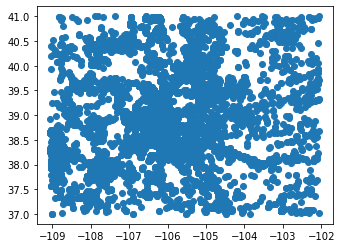

In [4]:
mining_hist.plot()

In [5]:
mining_hist.head()

STATE       COUNTY FTR_TYPE            FTR_NAME  FTR_AZIMUT      TOPO_NAME  \
0    CO   Las Animas     Adit       Jeffryes Mine       262.0       Trinidad   
1    CO   Las Animas     Adit          Viola Mine       222.0         Madrid   
2    CO       Gilpin     Adit                None        88.0   Central City   
3    CO  Clear Creek     Adit                None       212.0  Idaho Springs   
4    CO      Boulder     Adit  Seventhirty Tunnel       192.0      Nederland   

   TOPO_DATE TOPO_SCALE COMPILEDBY               REMARKS     GDA_ID    SCANID  \
0       1951      24000       USGS  Labeled as inactive.  5357027.0  401981.0   
1       1951      24000       USGS                  None  5352739.0  233682.0   
2       1972      24000       USGS                  None  5347903.0  232523.0   
3       1957      24000       USGS                  None  5351401.0  450676.0   
4       1972      24000       USGS                  None  5353811.0  233929.0   

                      geometry  
0  POINT (-104.52858 37.12719)  
1  POINT (-104.68486 37.21345)  
2  POINT (-105.50356 39.79395)  
3  POINT (-105.61787 39.71612)  
4  POINT (-105.58549 39.98335)

In [6]:
list(mining_hist)

['STATE',
 'COUNTY',
 'FTR_TYPE',
 'FTR_NAME',
 'FTR_AZIMUT',
 'TOPO_NAME',
 'TOPO_DATE',
 'TOPO_SCALE',
 'COMPILEDBY',
 'REMARKS',
 'GDA_ID',
 'SCANID',
 'geometry']

In [7]:
mining_hist.sample(10)

STATE      COUNTY      FTR_TYPE FTR_NAME  FTR_AZIMUT     TOPO_NAME  \
26650    CO  San Miguel  Prospect Pit     None         0.0         Egnar   
32977    CO    Saguache  Prospect Pit     None         0.0    Whale Hill   
5458     CO      Gilpin          Adit     None        76.0  Central City   
23173    CO    San Juan  Prospect Pit     None         0.0  Handies Peak   
37745    CO        Lake          Adit     None       226.0    Holy Cross   
40627    CO    Hinsdale  Prospect Pit     None         0.0     Silverton   
22774    CO      Custer  Prospect Pit     None         0.0    Westcliffe   
24182    CO    Gunnison  Prospect Pit     None         0.0      Big Mesa   
26300    CO     Chaffee  Prospect Pit     None         0.0   Salida East   
14626    CO        Park  Prospect Pit     None         0.0        Climax   

       TOPO_DATE TOPO_SCALE COMPILEDBY REMARKS     GDA_ID    SCANID  \
26650       1949      24000       USGS    None  5349307.0  232913.0   
32977       1980      24000       USGS    None  5357597.0  401805.0   
5458        1972      24000       USGS    None  5347903.0  232523.0   
23173       1955      24000       USGS    None  5350743.0  233215.0   
37745       1949      62500       USGS    None  5358463.0  402826.0   
40627       1955      62500       USGS    None  5358857.0  402613.0   
22774       1955      24000       USGS    None  5357541.0  401871.0   
24182       1970      24000       USGS    None  5346879.0  400114.0   
26300       1983      24000       USGS    None  5355633.0  234339.0   
14626       1970      24000       USGS    None  5348169.0  400824.0   

                          geometry  
26650  POINT (-108.93909 37.99563)  
32977  POINT (-106.10423 38.35409)  
5458   POINT (-105.60277 39.85813)  
23173  POINT (-107.58060 37.95072)  
37745  POINT (-106.39618 39.30136)  
40627  POINT (-107.55819 37.98269)  
22774  POINT (-105.47576 38.16075)  
24182  POINT (-107.05207 38.45071)  
26300  POINT (-105.91316 38.61574)  
14626  POINT (-106.14399 39.30234)

In [8]:
mining_hist['FTR_TYPE'].value_counts()

Prospect Pit                            24416
Adit                                    10545
Mine Shaft                               3980
Gravel Pit                               2414
Open Pit Mine                             584
Quarry                                    541
Open Pit Mine or Quarry                   195
Gravel/Borrow Pit - Undifferentiated      140
Mine                                      131
Clay Pit                                  101
Air Shaft                                  80
Borrow Pit                                 77
Sand Pit                                   32
Strip Mine                                 20
Placer Mine                                13
Mill Site                                  11
Coal Mine                                   6
Quarry - Rock                               2
Shale Pit                                   2
Uranium Mine                                2
Glory Hole                                  1
Diggings                          

In [9]:
mining_hist['TOPO_DATE'].value_counts()

1955    11169
1970     3948
1972     2931
1960     2713
1962     2582
        ...  
1935        1
1937        1
1929        1
1933        1
1905        1
Name: TOPO_DATE, Length: 73, dtype: int64

## Cleaning this up

Since I need to pare this down, I'll focus on just the mine related features. I'll create a copy of my data so that I can hang on to my original dataset.

In [10]:
mines_trimmed = mining_hist.copy()
mines_trimmed

STATE       COUNTY      FTR_TYPE            FTR_NAME  FTR_AZIMUT  \
0        CO   Las Animas          Adit       Jeffryes Mine       262.0   
1        CO   Las Animas          Adit          Viola Mine       222.0   
2        CO       Gilpin          Adit                None        88.0   
3        CO  Clear Creek          Adit                None       212.0   
4        CO      Boulder          Adit  Seventhirty Tunnel       192.0   
...     ...          ...           ...                 ...         ...   
43292    CO      Boulder        Quarry                None         0.0   
43293    CO      Fremont        Quarry                None         0.0   
43294    CO      Fremont        Quarry                None         0.0   
43295    CO       Moffat    Strip Mine                None         0.0   
43296    CO     Montrose  Uranium Mine   Uranium Girl Mine         0.0   

           TOPO_NAME  TOPO_DATE TOPO_SCALE COMPILEDBY  \
0           Trinidad       1951      24000       USGS   
1             Madrid       1951      24000       USGS   
2       Central City       1972      24000       USGS   
3      Idaho Springs       1957      24000       USGS   
4          Nederland       1972      24000       USGS   
...              ...        ...        ...        ...   
43292        Boulder       1957      62500       USGS   
43293       Cotopaxi       1959      62500       USGS   
43294    Royal Gorge       1959      62500       USGS   
43295        Maybell       1958      62500       USGS   
43296         La Sal       1954      62500       USGS   

                                                 REMARKS     GDA_ID    SCANID  \
0                                   Labeled as inactive.  5357027.0  401981.0   
1                                                   None  5352739.0  233682.0   
2                                                   None  5347903.0  232523.0   
3                                                   None  5351401.0  450676.0   
4                                                   None  5353811.0  233929.0   
...                                                  ...        ...       ...   
43292                                               None  5358075.0  402330.0   
43293                                               None  5358201.0  402266.0   
43294                                               None  5358847.0  402610.0   
43295  Label without symbol. Point placed at center o...  5358573.0  402787.0   
43296                                               None  5462583.0  250215.0   

                          geometry  
0      POINT (-104.52858 37.12719)  
1      POINT (-104.68486 37.21345)  
2      POINT (-105.50356 39.79395)  
3      POINT (-105.61787 39.71612)  
4      POINT (-105.58549 39.98335)  
...                            ...  
43292  POINT (-105.27468 40.21834)  
43293  POINT (-105.58883 38.38020)  
43294  POINT (-105.27191 38.49966)  
43295  POINT (-108.00788 40.54951)  
43296  POINT (-109.05378 38.32524)  

[43297 rows x 13 columns]

In [11]:
mines_trimmed = mines_trimmed.loc[mines_trimmed['FTR_TYPE'].isin(['Mine Shaft',
              'Open Pit Mine',
              'Quarry',
              'Open Pit Mine or Quarry',
              'Mine',
              'Strip Mine',
              'Placer Mine',
              'Coal Mine',
              'Quarry - Rock',
              'Uranium Mine'])]

In [12]:
mines_trimmed.shape

(5474, 13)

In [13]:
mines_trimmed.head()

STATE    COUNTY   FTR_TYPE FTR_NAME  FTR_AZIMUT         TOPO_NAME  \
7894    CO   Jackson  Coal Mine     None         0.0          Coalmont   
7895    CO   Jackson  Coal Mine     None         0.0          Coalmont   
7896    CO   Jackson  Coal Mine     None         0.0          Coalmont   
7897    CO  Garfield  Coal Mine     None         0.0             Rifle   
7898    CO      Weld  Coal Mine     None         0.0  Milton Reservoir   

      TOPO_DATE TOPO_SCALE COMPILEDBY               REMARKS     GDA_ID  \
7894       1955      24000       USGS                  None  5348207.0   
7895       1955      24000       USGS                  None  5348207.0   
7896       1955      24000       USGS                  None  5348207.0   
7897       1952      24000       USGS  Labeled as inactive.  5355287.0   
7898       1950      24000       USGS  Labeled as inactive.  5353203.0   

        SCANID                     geometry  
7894  232591.0  POINT (-106.49284 40.50346)  
7895  232591.0  POINT (-106.49473 40.50247)  
7896  232591.0  POINT (-106.49403 40.50049)  
7897  451611.0  POINT (-107.76933 39.59839)  
7898  451273.0  POINT (-104.74284 40.22302)

In [14]:
mines_trimmed.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 5474 entries, 7894 to 43296
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   STATE       5474 non-null   object  
 1   COUNTY      5474 non-null   object  
 2   FTR_TYPE    5474 non-null   object  
 3   FTR_NAME    667 non-null    object  
 4   FTR_AZIMUT  5474 non-null   float64 
 5   TOPO_NAME   5474 non-null   object  
 6   TOPO_DATE   5474 non-null   int64   
 7   TOPO_SCALE  5474 non-null   object  
 8   COMPILEDBY  5474 non-null   object  
 9   REMARKS     211 non-null    object  
 10  GDA_ID      5474 non-null   float64 
 11  SCANID      5474 non-null   float64 
 12  geometry    5474 non-null   geometry
dtypes: float64(3), geometry(1), int64(1), object(8)
memory usage: 598.7+ KB


In [15]:
mines_trimmed.plot()

<AxesSubplot:>

In [ ]:
mines_trimmed.to_file("historic_mines.geojson", driver = "GeoJSON")

I exported this as a geojson, I'll continue to work on this now that I can work with this more reasonable size and hopefully make some interesting maps! 